In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Grocery_Inventory new v1.csv')
df

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Parmesan Cheese,Dairy,Yakidoo,0 Fordem Place,Backordered,67-984-5368,39-714-7313,9/27/2024,10/4/2024,7/28/2024,52,56,34,$12.00,31,69,024%
986,Raw Sugar,Grains & Pulses,Flipopia,365 Vera Terrace,Active,44-782-1395,54-132-9762,9/29/2024,6/26/2024,11/17/2024,72,72,68,$1.50,39,78,-123%
987,Cabbage,Fruits & Vegetables,Topdrive,43 Washington Street,Discontinued,75-927-9108,27-406-7972,9/29/2024,6/17/2024,7/2/2024,24,32,17,$1.00,55,72,-100%
988,Green Beans,Fruits & Vegetables,Gigazoom,37 Browning Trail,Discontinued,78-614-4402,51-014-4287,9/30/2024,2/14/2025,4/25/2024,81,99,28,$2.00,20,85,-031%


### EDA (ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO DE DATOS)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Name             990 non-null    object
 1   Catagory                 989 non-null    object
 2   Supplier_Name            990 non-null    object
 3   Warehouse_Location       990 non-null    object
 4   Status                   990 non-null    object
 5   Product_ID               990 non-null    object
 6   Supplier_ID              990 non-null    object
 7   Date_Received            990 non-null    object
 8   Last_Order_Date          990 non-null    object
 9   Expiration_Date          990 non-null    object
 10  Stock_Quantity           990 non-null    int64 
 11  Reorder_Level            990 non-null    int64 
 12  Reorder_Quantity         990 non-null    int64 
 13  Unit_Price               990 non-null    object
 14  Sales_Volume             990 non-null    i

In [5]:
date_colum = ['Date_Received','Last_Order_Date','Expiration_Date']

for col in date_colum:
    df[col] = pd.to_datetime(df[col],format = '%m/%d/%Y', dayfirst = False, errors = 'coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_Name             990 non-null    object        
 1   Catagory                 989 non-null    object        
 2   Supplier_Name            990 non-null    object        
 3   Warehouse_Location       990 non-null    object        
 4   Status                   990 non-null    object        
 5   Product_ID               990 non-null    object        
 6   Supplier_ID              990 non-null    object        
 7   Date_Received            990 non-null    datetime64[ns]
 8   Last_Order_Date          990 non-null    datetime64[ns]
 9   Expiration_Date          990 non-null    datetime64[ns]
 10  Stock_Quantity           990 non-null    int64         
 11  Reorder_Level            990 non-null    int64         
 12  Reorder_Quantity         990 non-nul

In [10]:
df.isna().sum()

Product_Name               0
Catagory                   1
Supplier_Name              0
Warehouse_Location         0
Status                     0
Product_ID                 0
Supplier_ID                0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Sales_Volume               0
Inventory_Turnover_Rate    0
percentage                 0
dtype: int64

In [13]:
df[df.isna().any(axis = 1)]

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
572,Cabbage,NaN,Rooxo,2 Butterfield Pass,Discontinued,10-378-9729,83-941-9620,2024-12-23,2024-11-26,2024-09-21,69,21,68,$66.55,36,35,022%


In [16]:
df.dropna(axis = 0, inplace = True)

In [18]:
df['Unit_Price'] = df['Unit_Price'].replace(r'[\$]', '', regex=True).astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_Name             989 non-null    object        
 1   Catagory                 989 non-null    object        
 2   Supplier_Name            989 non-null    object        
 3   Warehouse_Location       989 non-null    object        
 4   Status                   989 non-null    object        
 5   Product_ID               989 non-null    object        
 6   Supplier_ID              989 non-null    object        
 7   Date_Received            989 non-null    datetime64[ns]
 8   Last_Order_Date          989 non-null    datetime64[ns]
 9   Expiration_Date          989 non-null    datetime64[ns]
 10  Stock_Quantity           989 non-null    int64         
 11  Reorder_Level            989 non-null    int64         
 12  Reorder_Quantity         989 non-null    

In [21]:
df.duplicated().sum()

np.int64(0)

### CREACIÓN DE VARIABLES

In [22]:
df['Ventas_totales'] = df['Sales_Volume']*df['Unit_Price']

### ANÁLISIS ABC

In [23]:
abc = df.copy()

In [25]:
abc['porcentaje_contr'] = ((abc['Ventas_totales'] / abc['Ventas_totales'].sum())*100)

In [26]:
abc = abc.sort_values('porcentaje_contr', ascending = False)
abc['acum_porce'] = abc['porcentaje_contr'].cumsum()

In [27]:
abc['tipo_contribu'] = abc['acum_porce'].apply(lambda x : "'A' tier prodcuts" if x <= 80 else "'B' Tier prodcuts" if x <= 95 else "'C' Tier product")

In [39]:
abc.head(5)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,...,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Ventas_totales,porcentaje_contr,acum_porce,tipo_contribu
365,Greek Yogurt,Fruits & Vegetables,Meeveo,3 Hagan Drive,Discontinued,68-734-1585,54-537-5633,2025-01-08,2024-04-16,2024-07-13,...,44,11,51.17,92,37,084%,4707.64,1.377012,1.377012,'A' tier prodcuts
89,Banana,Fruits & Vegetables,Youfeed,3825 Raven Avenue,Discontinued,48-957-8596,40-817-2222,2024-09-04,2024-04-24,2024-10-18,...,25,91,53.82,87,5,-053%,4682.34,1.369612,2.746624,'A' tier prodcuts
962,Banana,Fruits & Vegetables,Vinder,8 Heffernan Point,Active,87-698-0944,73-717-0190,2024-09-17,2024-08-27,2025-02-02,...,12,59,98.43,35,16,080%,3445.05,1.007697,3.754321,'A' tier prodcuts
164,Herbal Tea,Beverages,Wikido,620 Mockingbird Pass,Active,19-244-9890,98-107-0604,2024-03-07,2024-10-02,2024-11-09,...,22,98,30.00,90,11,-098%,2700.00,0.789766,4.544087,'A' tier prodcuts
214,White Tea,Beverages,Skipstorm,5756 Stephen Avenue,Active,20-225-3930,73-069-2753,2024-12-08,2024-02-29,2024-03-17,...,87,10,25.00,93,70,-004%,2325.00,0.680076,5.224163,'A' tier prodcuts


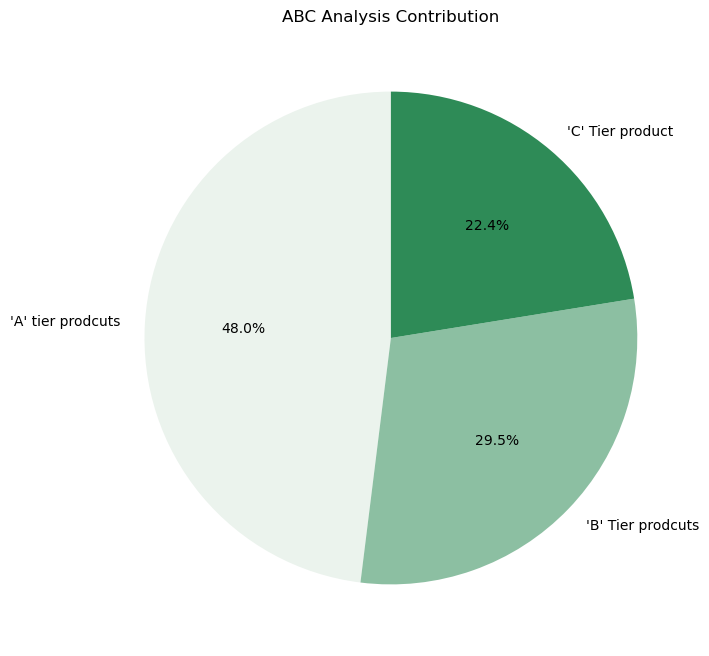

In [38]:
category_conteo = abc['tipo_contribu'].value_counts()

fig, ax = plt.subplots(figsize=(10,8))
category_conteo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.light_palette('seagreen', n_colors=3))
plt.title('ABC Analysis Contribution')
plt.ylabel('')
plt.show()

### Análisis de movimiento de inventario

In [42]:
# Calculamos los cuartiles, será nuestro segmentador
cuartiles = df['Inventory_Turnover_Rate'].quantile([0.25,0.50, 0.75])

#Definimos la categoría del inventario en base a los cuartiles
def score(x,q):
    if x <= q[0.25]:
        return 'Slow Moving'
    elif x <= q[0.50]:
        return 'Medium Moving'
    elif x <= q[0.75]:
        return 'Fast Moving'
    else:
        return 'Super fast Moving'

#Creamos un nuevo dataframe
rotacion_inv = df.copy()

#Usamos apply para aplicar nuestras condiciones al nuevo dataframe
rotacion_inv['inventory_Turnover_segment'] = rotacion_inv['Inventory_Turnover_Rate'].apply(score, args = (cuartiles,))

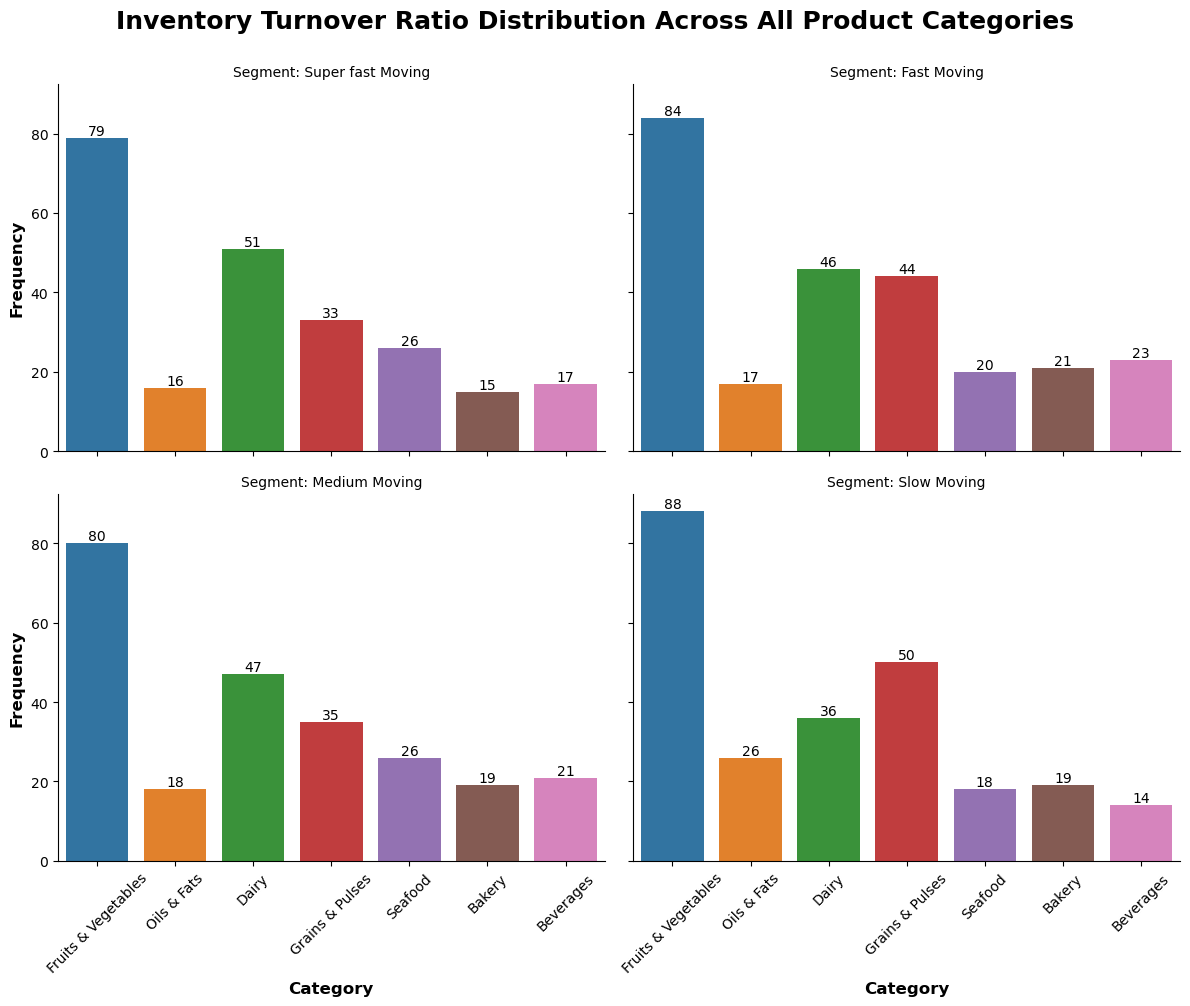

In [51]:
# Importamos CategoricalDtype para crear categorias por segmento y en orden especifico
from pandas.api.types import CategoricalDtype

# Definimos el orden de la categoria
segment_order = ['Super fast Moving', 'Fast Moving', 'Medium Moving', 'Slow Moving']

# Creamos la categoria y le pasamos el orden definido
cat_type = CategoricalDtype(categories=segment_order, ordered=True)

# Creamos el count plot para separar por segmento 
g = sns.catplot(data=rotacion_inv, x='Catagory', kind='count', col='inventory_Turnover_segment', 
                col_order=segment_order, col_wrap=2, height=5, aspect=1.2, hue = 'Catagory')

# Agregamos el titulo 
g.set_titles('Segment: {col_name}')
g.set_axis_labels('Category', 'Frequency', fontsize=12, fontweight='bold')

# Rotamos el x-axis y agregamos el número a cada barra
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d')

# Agregamos el titulo a la figura
g.fig.suptitle('Inventory Turnover Ratio Distribution Across All Product Categories', y=1.002, fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()